# Import Libraies

In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import shap
import numpy as np
from helperfunc import *


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


# Read Data

In [2]:
# Load the data
all_data = pd.read_csv('main_data_influenza.csv')
# drop zero cols
all_data = all_data.loc[:, all_data.any()]
col_names = all_data.columns[:-2]


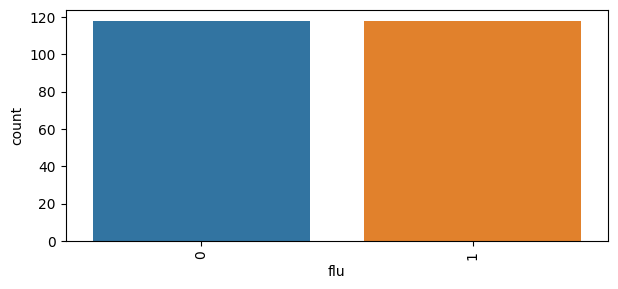

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 3))
g = sns.countplot(data=all_data, x='flu')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed for better visibility
plt.show()

n_quantiles (1000) is greater than the total number of samples (186). n_quantiles is set to n_samples.
LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


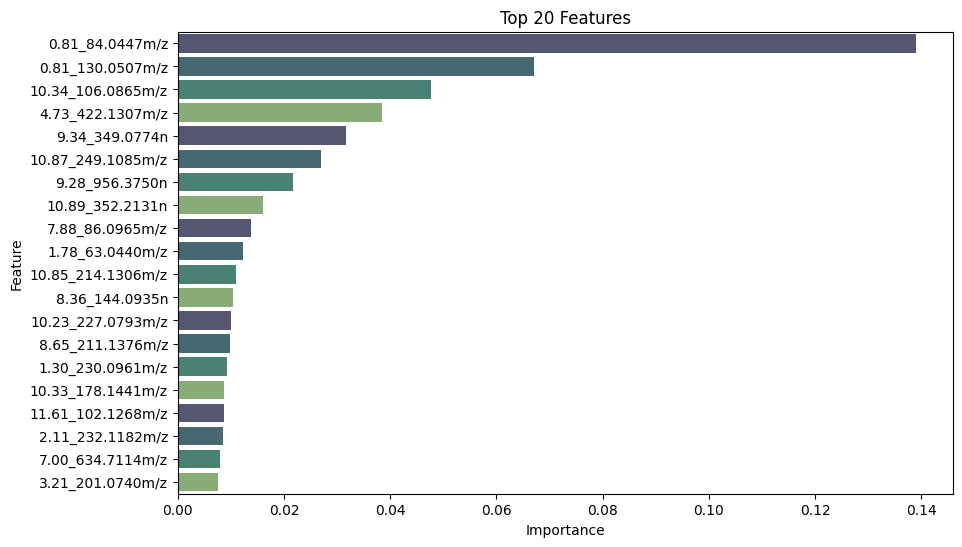

In [4]:
#### Split the data

fi_shap, color, feature_names=feature_selection_metabolomics(all_data,col_names)
# Plot feature importances
plot_feature_selction(fi_shap, color, feature_names, title="Top 20 Features")

In [5]:
top_20_features = feature_names.to_list()
top_20_features

['0.81_84.0447m/z',
 '0.81_130.0507m/z',
 '10.34_106.0865m/z',
 '4.73_422.1307m/z',
 '9.34_349.0774n',
 '10.87_249.1085m/z',
 '9.28_956.3750n',
 '10.89_352.2131n',
 '7.88_86.0965m/z',
 '1.78_63.0440m/z',
 '10.85_214.1306m/z',
 '8.36_144.0935n',
 '10.23_227.0793m/z',
 '8.65_211.1376m/z',
 '1.30_230.0961m/z',
 '10.33_178.1441m/z',
 '11.61_102.1268m/z',
 '2.11_232.1182m/z',
 '7.00_634.7114m/z',
 '3.21_201.0740m/z']

convert label

In [6]:
feature_selection_model = top_20_features

fold_data = cv_foldcsv(n_splits=5, shuffle=False,feature_selection_model=feature_selection_model)
fold_data

{'data': ([array([[ 0.01567182,  0.13694282,  1.21792459, ..., -0.6279104 ,
           -0.38926939, -0.25314875],
          [ 0.81237826,  0.83396262, -0.38685301, ..., -0.64941879,
           -0.31238058, -0.72376786],
          [-0.70261188, -0.67514591,  0.91847049, ..., -0.45872809,
           -0.27784452,  0.14370228],
          ...,
          [-0.71228428, -0.74258092,  1.17607561, ..., -0.2846185 ,
           -0.27689168, -0.3631303 ],
          [-0.77450962, -0.87344092, -0.27837348, ...,  2.52695601,
           -0.71635809, -1.42509843],
          [-0.60753729, -0.67715119, -0.37113375, ..., -0.43125528,
            0.61475532,  1.2461435 ]]),
   array([[ 0.765015  ,  0.76312528, -0.38702152, ...,  0.29894298,
            0.38982172,  2.79848225],
          [-0.92210023, -0.9099171 ,  0.62401724, ..., -0.29472372,
           -0.75534534, -0.16983779],
          [ 0.69912316,  0.81930839, -0.38857129, ..., -0.26836055,
           -0.61820988, -0.76331617],
          ...,
      

In [22]:
feature_num= 20
#feature_num= len(filtered_xgboost)
feature_selection_model= top_20_features
#feature_selection_model= filtered_xgboost   ##choose any of them [xgboost,randomforest,extratree, genetic_feature_selection]
classifier='all' ## choose 'all' for all models

#Classification with top features increasing by 1 by 1
model, Result, prb1,prb0,ytest,tar,pred,confusion_matrices,rep = classification_with_combined_features_withauc2(fold_data,feature_num,feature_selection_model,classifier)


Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
`max_features='auto'` has been deprecated 

[17:40:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "iterations", "loss_function" } are not used.

[17:40:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "iterations", "loss_function" } are not used.

[17:40:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "iterations", "loss_function" } are not used.

[17:40:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "iterations", "loss_function" } are not used.

[17:40:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windo

The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge


In [23]:
model

 RandomForestClassifier(),
 AdaBoostClassifier(n_estimators=100, random_state=0)]

In [24]:
# # Directory where models will be saved
import os
model_save_path = "Pickel_models"  # Replace with your desired path

# Create the directory if it doesn't exist
os.makedirs(model_save_path, exist_ok=True)

# Save each model to the specified directory
i=1
for mdl in model:
    # print(model)
    model_path = os.path.join(model_save_path, f"top_model_{i+1}.pkl")
    i = i+1
    with open(model_path, "wb") as file:
        pickle.dump(mdl, file)

# # print("Top 3 models saved successfully.")

In [11]:
Result

,Accuracy,Precision,Recall,Specificity,F1-score,AUC
MLPClassifier,90.833333,90.954522,90.833333,91.010145,90.837154,96.31
LinearDiscriminantAnalysis,91.250000,91.249826,91.250000,91.184783,91.248325,96.23
XGBClassifier,90.833333,90.838327,90.833333,90.731884,90.829504,94.34
RandomForestClassifier,92.916667,92.922113,92.916667,92.926812,92.917775,97.76
LogisticRegression,92.916667,93.003472,92.916667,93.065942,92.919742,93.27
SVM,92.500000,92.500000,92.500000,92.473913,92.500000,93.54
ExtraTreesClassifier,92.500000,92.537014,92.500000,92.334783,92.492683,97.46
AdaBoostClassifier,93.750000,94.015920,93.750000,94.041304,93.750977,98.34
KNeighborsClassifier,89.583333,89.618934,89.583333,89.651449,89.587134,94.55
GradientBoostingClassifier,89.583333,90.097191,89.583333,89.999275,89.576279,95.04


In [25]:

top_3_accuracy_models = Result.nlargest(4, 'Accuracy')
top_3_accuracy_models

,Accuracy,Precision,Recall,Specificity,F1-score,AUC
CatBoost_untuned,94.583333,94.588316,94.583333,94.599275,94.584181,98.57
RandomForest_untuned,94.166667,94.166667,94.166667,94.146377,94.166667,97.74
AdaBoostClassifier,93.750000,94.015920,93.750000,94.041304,93.750977,98.34
ExtraTrees_untuned,93.750000,93.750870,93.750000,93.693478,93.748804,97.52


In [15]:
Result.to_csv('results_xgbBoost/XgbBoosttop20_initital.csv')

Model Index:


'MLPClassifier' 0, 

'LinearDiscriminantAnalysis' 1, 

'XGBClassifier' 2,

'RandomForestClassifier' 3, 

'LogisticRegression' 4, 

'SVM' 5,

'ExtraTreesClassifier' 6, 

'AdaBoostClassifier' 7, 

'KNeighborsClassifier' 8,

'GradientBoostingClassifier' 9, 

'XGB_untuned' 10, 

'CatBoost_untuned' 11, 

'LGBM_untuned' 12, 

'AdaBoost_untuned' 13, 

'SVC_untuned' 14, 

'RandomForest_untuned' 15, 

'ExtraTrees_untuned' 16, 

'KNeighbors_untuned' 17, 

'LDA_untuned' 18, 

'LogisticRegression_untuned' 19, 

'ElasticNet_untuned' 20, 

In [31]:
Result.to_csv('Pickel_models/results/initial_res.csv')

# Stacking

In [27]:
###Top-3 models to develop stacking model         -----choose 0= MLP, 1= LDA, 2 = XGBoost, 3 = RF, 4= Logit, 5=SVC, 6 = Extra tree, 7= Adaboost, 8 = KNN, 9 = GradientBoost
ml1=prb1[11] #model 1

ml2=prb1[15]  #model 2

ml3=prb1[7]  #model 3

td2=ytest  # target


In [28]:
Result2, prb2,prb02,ytest2,tar2,pred2= stacking_classification(ml1,ml2,ml3,td2)

0 is [[109   6]
 [  6 119]]
1 is [[111   4]
 [  7 118]]
2 is [[110   5]
 [  8 117]]


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTr

3 is [[111   4]
 [  5 120]]
4 is [[109   6]
 [  6 119]]
5 is [[110   5]
 [  5 120]]
6 is [[112   3]
 [  5 120]]
7 is [[111   4]
 [  7 118]]
8 is [[109   6]
 [  7 118]]
9 is [[107   8]
 [  6 119]]
[17:43:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "iterations", "loss_function" } are not used.

[17:43:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "iterations", "loss_function" } are not used.

[17:43:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "iterations", "loss_function" } are not used.

[17:43:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.


In [14]:
Result2.to_csv('results_xgbBoost/randomXgbBossttop20_Stackingl.csv')

In [29]:
Result2

,Accuracy,Precision,Recall,Specificity,F1-score,Auc
MLPClassifier,95.00,95.00,95.00,94.98,95.00,0.974887
LinearDiscriminantAnalysis,95.42,95.45,95.42,95.50,95.42,0.979965
XGBClassifier,94.58,94.62,94.58,94.67,94.59,0.979200
RandomForestClassifier,96.25,96.25,96.25,96.27,96.25,0.982191
LogisticRegression,95.00,95.00,95.00,94.98,95.00,0.983652
SVM,95.83,95.83,95.83,95.82,95.83,0.982887
ExtraTreesClassifier,96.67,96.68,96.67,96.72,96.66,0.988661
AdaBoostClassifier,95.42,95.45,95.42,95.50,95.42,0.971930
KNeighborsClassifier,94.58,94.59,94.58,94.60,94.58,0.964557
GradientBoostingClassifier,94.17,94.17,94.16,94.08,94.16,0.986539


In [32]:
Result2.to_csv('Pickel_models/results/stacking_res.csv')

In [30]:

top_3_accuracy_models = Result2.nlargest(3, 'Accuracy')
top_3_accuracy_models

,Accuracy,Precision,Recall,Specificity,F1-score,Auc
ExtraTrees_untuned,97.08,97.11,97.08,97.18,97.08,0.981287
ExtraTreesClassifier,96.67,96.68,96.67,96.72,96.66,0.988661
RandomForestClassifier,96.25,96.25,96.25,96.27,96.25,0.982191


# AUC

In [17]:
ml1=prb1[16] #model 1

ml2=prb1[3]  #model 2

ml3=prb1[4]  

In [33]:
ml1=prb1[16]
y1 = td2
y1[0]

0     0
1     1
2     1
3     1
4     0
5     1
6     1
7     0
8     1
9     0
10    0
11    0
12    0
13    1
14    1
15    0
16    0
17    1
18    1
19    0
20    1
21    1
22    0
23    1
24    0
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    0
33    1
34    1
35    1
36    0
37    0
38    1
39    0
40    1
41    1
42    1
43    0
44    0
45    1
46    0
47    0
Name: label, dtype: int64

In [63]:
for i in range(5):
    print(i)

0
1
2
3
4


In [60]:
ml1=prb1[16]
y1 =td2

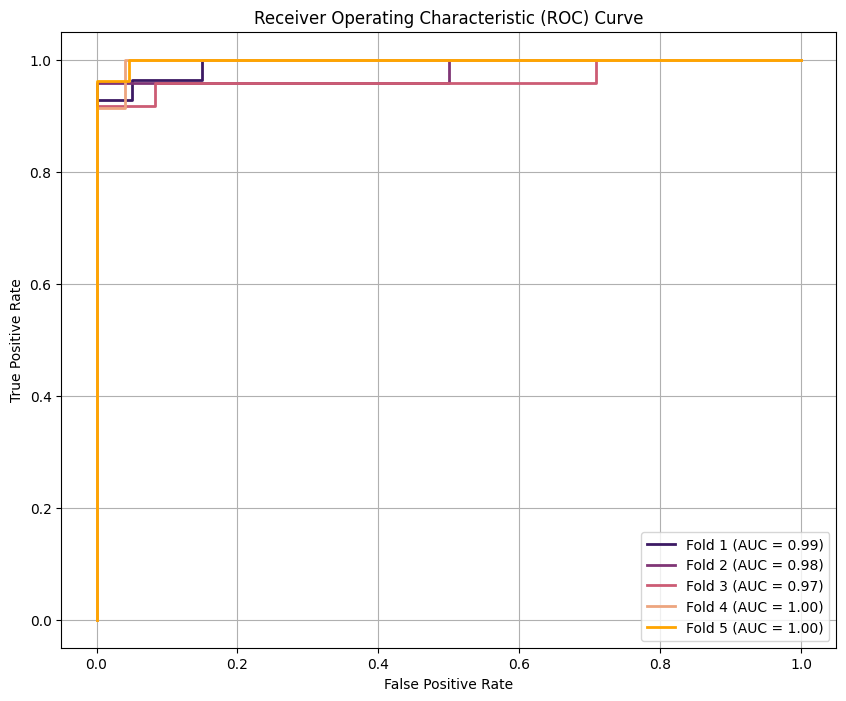

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
ml1=prb2[1]
y1 =td2
# Assuming ml1 is a list containing probability predictions for each fold
# and y1 is a list containing true labels for each fold

plt.figure(figsize=(10, 8), facecolor='w')  # Set facecolor to white

# Define a set of colors for each fold
colors = ['#3c1a64', '#803576', '#cc5c74', '#eda57f', 'orange']

for fold_num in range(5):
    probabilities = np.array(ml1[fold_num])
    true_labels = y1[fold_num]

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(true_labels, probabilities[:, 1])

    # Calculate AUC
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve for each fold with a different color and style
    plt.plot(fpr, tpr, lw=2, label=f'Fold {fold_num + 1} (AUC = %0.2f)' % roc_auc, color=colors[fold_num], linestyle='-')

# Plot the diagonal line for reference

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('Pickel_models/results/Auc_extratree.pdf', bbox_inches='tight', dpi=4000)
plt.show()


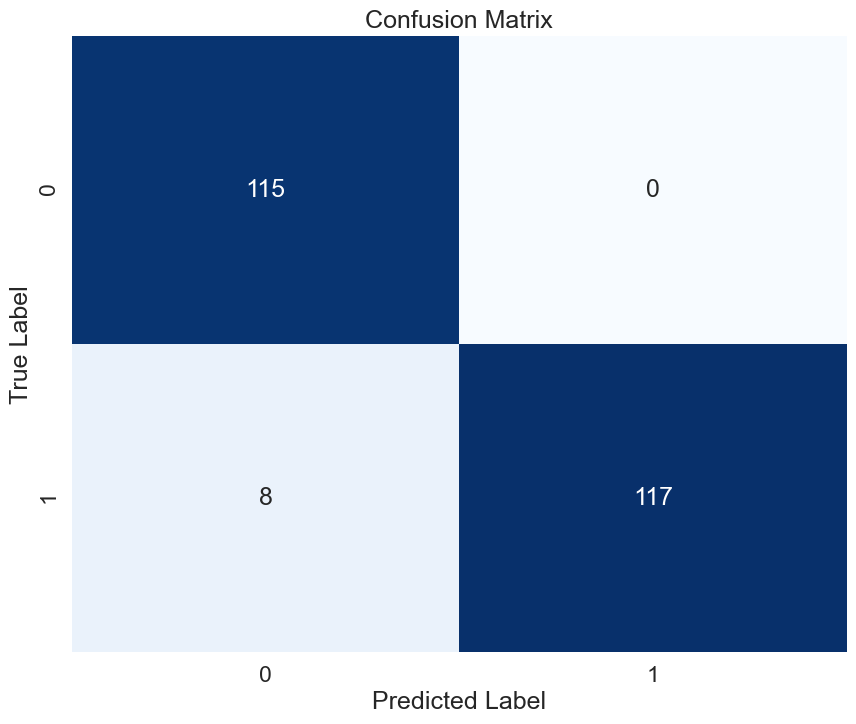

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd

# Assuming your confusion matrix is stored in the variable 'conf_matrix'
conf_matrix =[[113 ,  2],
 [  5 ,120]]
# Define class labels
class_labels = ['0', '1']

# Create a DataFrame from the confusion matrix
conf_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)

# Set font size
sns.set(font_scale=1.5)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Save as PDF
plt.savefig('Pickel_models/results/Extree_confussion mattrix.pdf',dpi=4000,  format='pdf', bbox_inches='tight')

plt.show()


#parallel 